In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
brakes_pi=pd.read_csv('C:/Users/apoor/Desktop/Module 3/Industry Practicum/Data/brakes_pi_full_filtered.csv')
brakes_pi=brakes_pi.loc[brakes_pi_prev["STORE_NUMBER"] != 1020]
print(brakes_pi.shape)
print(brakes_pi.SKU_NUMBER.nunique())

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,79,80,81,82,83,84,86,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


MemoryError: Unable to allocate 6.53 GiB for an array with shape (88, 9954751) and data type object

In [2]:
brakes_pi.drop([ 'PLATFORM_CLUSTER_NAME','POP_EST_CY', 'POP_DENSITY_CY', 'PCT_WHITE', 'AGE',
       'PCT_COLLEGE', 'PCT_BLUE_COLLAR','PART_TYPE','SKU_EXISTENCE_CY','SKU_STORE_PDQ_CY', 'TOTAL_VIO_CY','UNADJUSTED_TOTAL_VIO_CY',
       'LOST_QTY_CY',  'SS_SALES_CY','AVG_CLUSTER_UNIT_SALES_CY','AVG_CLUSTER_LOST_SALES_CY',
       'VIO_COMPARED_TO_CLUSTER_CY','ADJUSTED_AVG_CLUSTER_SALES_CY','AVG_CLUSTER_TOTAL_SALES_CY', 'SALES_SIGNAL_CY',
       'FAILURE_SALES_CY','LIFECYCLE_CY', 'ADJUSTED_LIFECYCLE_CY','PCT_OF_LIFECYCLE_REMAINING',
        'ADJ_AVG_CLUSTER_LOST_SALES_CY', 'LIFECYCLE_PRE_PEAK_POST','ADJ_AVG_CLUSTER_TOTAL_SALES_CY',
        'SOLD_SINCE_MAXI', 'cy_unit_sales','cy_gross_sales', 'cy_sales_cost',
       'other_unit_sales', 'other_gross_sales', 'other_sales_cost','PROJECTED_GROWTH_PCT_CY', 
        'OTHER_UNIT_PLS_LOST_SALES_PPY','OTHER_UNIT_PLS_LOST_SALES_PY', 'OTHER_UNIT_PLS_LOST_SALES_CY', 'LOOKUP_CNT_CY',
       'WEIGHTED_LOOKUP_CNT_CY', 'CY_PERIODS_IN_STOCK', 'WAIT_TIME_BUCKET',
       'MPOG_ID', 'DATA_CLASSIFICATION', 'cy_qty_sold_transfer',
       'cy_qty_sold_on_hand', 'ON_HAND','cy_ts_forecast', 'PROJECTED_GROWTH_PCT_PY','ROAD_QUALITY_INDEX','LOST_QTY_PY',
            'MEDIAN_HOUSEHOLD_INCOME'], axis=1, inplace=True)

NameError: name 'brakes_pi' is not defined

In [5]:
brakes_pi.columns

Index(['SKU_NUMBER', 'STORE_NUMBER', 'APPLICATION_COUNT', 'ESTABLISHMENTS',
       'SKU_EXISTENCE_PY', 'SKU_STORE_PDQ_PY', 'TOTAL_VIO_PY',
       'UNADJUSTED_TOTAL_VIO_PY', 'SS_SALES_PY', 'AVG_CLUSTER_UNIT_SALES_PY',
       'AVG_CLUSTER_LOST_SALES_PY', 'VIO_COMPARED_TO_CLUSTER_PY',
       'ADJUSTED_AVG_CLUSTER_SALES_PY', 'QTY_SOLD_PPY', 'QTY_SOLD_PY',
       'QTY_SOLD_CY', 'AVG_CLUSTER_TOTAL_SALES_PY', 'SALES_SIGNAL_PY',
       'FAILURE_SALES_PY', 'LIFECYCLE_PY', 'ADJUSTED_LIFECYCLE_PY',
       'ADJ_AVG_CLUSTER_LOST_SALES_PY', 'ADJ_AVG_CLUSTER_TOTAL_SALES_PY',
       'py_unit_sales', 'ppy_unit_sales', 'py_gross_sales', 'ppy_gross_sales',
       'py_sales_cost', 'ppy_sales_cost', 'LOOKUP_CNT_PY',
       'WEIGHTED_LOOKUP_CNT_PY', 'py_qty_sold_transfer', 'py_qty_sold_on_hand',
       'ppy_qty_sold_transfer', 'ppy_qty_sold_on_hand', 'fy_ts_forecast'],
      dtype='object')

In [6]:
brakes_pi.shape

(6253303, 36)

In [7]:
sku_sales = brakes_pi.groupby('SKU_NUMBER').agg({'QTY_SOLD_CY':'sum'})
sales_skus = list(sku_sales[sku_sales['QTY_SOLD_CY']>=5].index)

brakes_pi_sales = brakes_pi[(brakes_pi['SKU_NUMBER'].isin(sales_skus))]

In [8]:
brakes_pi_sales.shape

(1572103, 36)

In [9]:
brakes_pi_sales.dtypes

SKU_NUMBER                          int64
STORE_NUMBER                        int64
APPLICATION_COUNT                   int64
ESTABLISHMENTS                    float64
SKU_EXISTENCE_PY                    int64
SKU_STORE_PDQ_PY                    int64
TOTAL_VIO_PY                      float64
UNADJUSTED_TOTAL_VIO_PY           float64
SS_SALES_PY                       float64
AVG_CLUSTER_UNIT_SALES_PY         float64
AVG_CLUSTER_LOST_SALES_PY         float64
VIO_COMPARED_TO_CLUSTER_PY        float64
ADJUSTED_AVG_CLUSTER_SALES_PY     float64
QTY_SOLD_PPY                      float64
QTY_SOLD_PY                       float64
QTY_SOLD_CY                       float64
AVG_CLUSTER_TOTAL_SALES_PY        float64
SALES_SIGNAL_PY                   float64
FAILURE_SALES_PY                  float64
LIFECYCLE_PY                      float64
ADJUSTED_LIFECYCLE_PY             float64
ADJ_AVG_CLUSTER_LOST_SALES_PY     float64
ADJ_AVG_CLUSTER_TOTAL_SALES_PY    float64
py_unit_sales                     

In [10]:
brakes_pi_sales = brakes_pi_sales.fillna(0)

In [11]:
X = brakes_pi_sales.loc[:, (brakes_pi_sales.columns != 'QTY_SOLD_CY') & (brakes_pi_sales.columns != 'SKU_NUMBER')& (brakes_pi_sales.columns != 'STORE_NUMBER')].values
y = brakes_pi_sales['QTY_SOLD_CY'].values

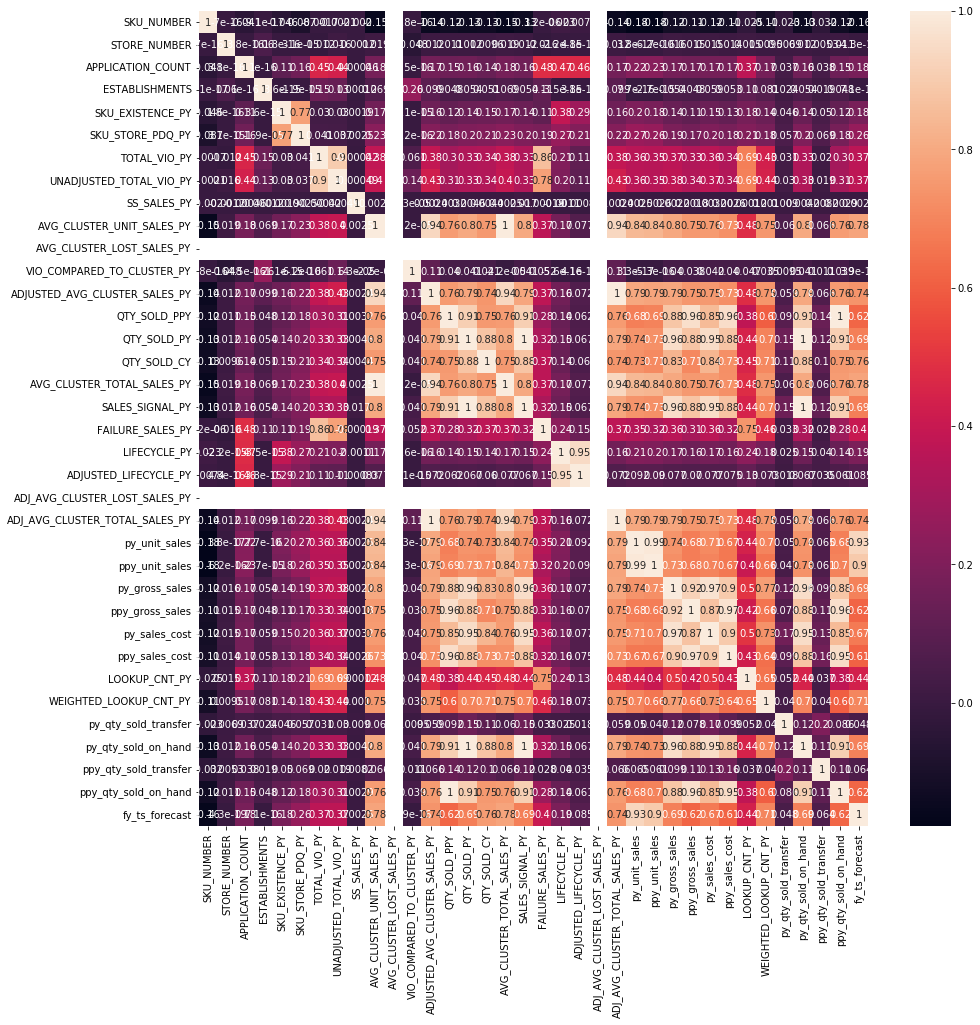

In [12]:
plt.figure(figsize=(15,15))
corrMatrix = brakes_pi_sales.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [13]:
#Correlation with output variable
cor_target = abs(corrMatrix["QTY_SOLD_CY"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

AVG_CLUSTER_UNIT_SALES_PY         0.753985
ADJUSTED_AVG_CLUSTER_SALES_PY     0.743928
QTY_SOLD_PPY                      0.753811
QTY_SOLD_PY                       0.877274
QTY_SOLD_CY                       1.000000
AVG_CLUSTER_TOTAL_SALES_PY        0.753985
SALES_SIGNAL_PY                   0.877212
ADJ_AVG_CLUSTER_TOTAL_SALES_PY    0.743928
py_unit_sales                     0.733720
ppy_unit_sales                    0.711147
py_gross_sales                    0.833678
ppy_gross_sales                   0.709314
py_sales_cost                     0.837694
ppy_sales_cost                    0.726994
LOOKUP_CNT_PY                     0.453287
WEIGHTED_LOOKUP_CNT_PY            0.709487
py_qty_sold_on_hand               0.877682
ppy_qty_sold_on_hand              0.753526
fy_ts_forecast                    0.763218
Name: QTY_SOLD_CY, dtype: float64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)

In [29]:
print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_val.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")

No. of training examples: 943261
No. of testing examples: 314421
No. of testing examples: 314421


### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
y_pred = regressor.predict(X_test)

In [32]:
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_test

,Actual,Predicted
0,0.0,-0.312601
1,0.0,0.085685
2,0.0,-0.076038
3,0.0,2.196792
4,4.0,2.368867
...,...,...
314416,0.0,0.210346
314417,0.0,0.197630
314418,21.0,30.591289
314419,0.0,0.116347


In [36]:
y_pred_1 = regressor.predict(X_val)

In [38]:
df_val = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred_1})
df_val

,Actual,Predicted
0,40.0,34.204202
1,27.0,22.429211
2,0.0,0.046192
3,2.0,1.058755
4,18.0,11.933081
...,...,...
314416,1.0,0.856564
314417,0.0,0.665654
314418,0.0,-0.040857
314419,0.0,-1.616155


In [39]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared value:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.9571147559528135
Mean Squared Error: 31.599355696716778
Root Mean Squared Error: 5.621330420524734
R-Squared value: 0.8631159557820987


In [40]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_1))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_1)))
print('R-Squared value:', metrics.r2_score(y_val, y_pred_1))

Mean Absolute Error: 1.9559774567697916
Mean Squared Error: 30.638148999713774
Root Mean Squared Error: 5.535173800316822
R-Squared value: 0.8644026486614295


In [ ]:
#REsidual Plot
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_test['Residuals'] = df_test['Actual']-df_test['Predicted']
plt.scatter(df_test['Predicted'], df_test['Residuals'] color = "maroon")
plt.title("Actual vs Predicted: Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

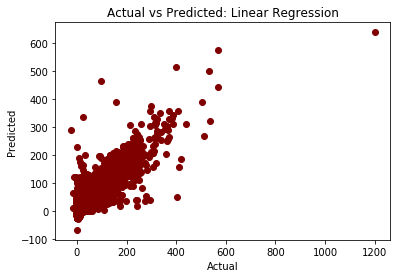

In [129]:
plt.scatter(y_test, y_pred, color = "maroon")
#g=plt.plot(y_test - y_pred,marker='o',linestyle='')
#plt.plot(X_train, regressor.predict(X_train), color = "green")
plt.title("Actual vs Predicted: Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### Feature Selection using OLS

In [ ]:
X_OLS = brakes_pi_sales.loc[:, (brakes_pi_sales.columns != 'QTY_SOLD_CY') & (brakes_pi_sales.columns != 'SKU_NUMBER')& (brakes_pi_sales.columns != 'STORE_NUMBER')]
y_OLS = brakes_pi_sales['QTY_SOLD_CY']

In [ ]:
import statsmodels.api as sm

X_OLS_1 = sm.add_constant(X_OLS)

#Fitting sm.OLS model
model_OLS = sm.OLS(y_OLS,X_OLS_1).fit()
model_OLS.pvalues

In [ ]:
#Backward Elimination
cols = list(X_OLS.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_OLS_1 = X_OLS[cols]
    X_OLS_1 = sm.add_constant(X_OLS_1)
    model = sm.OLS(y_OLS,X_OLS_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

### Random Forest

In [96]:
from sklearn.ensemble import RandomForestRegressor

# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 20, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [116]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [117]:
# Predicting the target values of the test set
y_pred_RF = model.predict(X_test)

In [118]:
y_pred_RF_1 = model.predict(X_val)

In [119]:
# Validation Metrics
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print("R-Squared: ", metrics.r2_score(y_test, y_pred_RF))

RMSE:  4.636187856454289
R-Squared:  0.9068899305667775


In [120]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_val, y_pred_RF_1)))
print("R-Squared: ", metrics.r2_score(y_val, y_pred_RF_1))

RMSE:  4.586302530460969
R-Squared:  0.9069076313391765


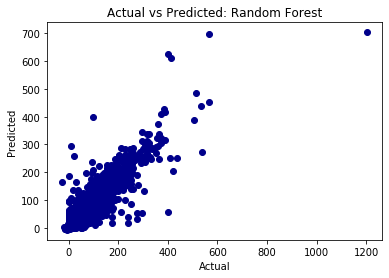

In [126]:
plt.scatter(y_test, y_pred_RF, color = "darkblue")
#g=plt.plot(y_test - y_pred,marker='o',linestyle='')
#plt.plot(X_train, regressor.predict(X_train), color = "green")
plt.title("Actual vs Predicted: Random Forest")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [91]:
model3 = RandomForestRegressor(n_estimators = 25, max_depth=9, max_features=7, random_state = 0)
model3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [92]:
y_pred_RF_val = model3.predict(X_val)

In [93]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_val, y_pred_RF_val)))
print("R-Squared: ", metrics.r2_score(y_val, y_pred_RF_val))

RMSE:  4.60836508620275
R-Squared:  0.9060098294047577


In [94]:
y_pred_RF = model3.predict(X_test)

In [95]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print("R-Squared: ", metrics.r2_score(y_test, y_pred_RF))

RMSE:  4.645670481825686
R-Squared:  0.9065086557426059


In [112]:
model2 = RandomForestRegressor(n_estimators = 20, max_depth = 10, random_state = 0)
model2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [113]:
y_pred_RF_val = model2.predict(X_val)
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_val, y_pred_RF_val)))
print("R-Squared: ", metrics.r2_score(y_val, y_pred_RF_val))

RMSE:  4.620396824312971
R-Squared:  0.90551840072908


In [114]:
y_pred_RF = model2.predict(X_test)
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print("R-Squared: ", metrics.r2_score(y_test, y_pred_RF))

RMSE:  4.756249171524106
R-Squared:  0.9020050270714748


In [115]:
kfold = model_selection.KFold(n_splits=10, random_state=123, shuffle = True)
model_CV = RandomForestRegressor(n_estimators = 20)
results = model_selection.cross_val_score(model_CV, X, y, cv=kfold)
print(results.mean())

KeyboardInterrupt: 

In [26]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_RF})
#df['Diff']=(df['Actual']-df['Predicted'])/(df['Actual']-0.0001)
#df_new = df[(df['Diff']<0.95) & (df['Diff']>-0.95)]

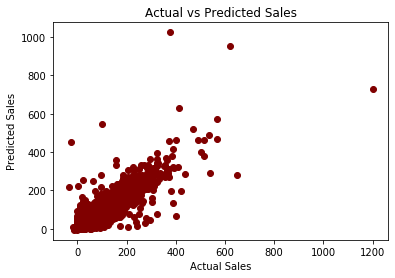

In [27]:
plt.figure(figsize=(6,4))
plt.scatter(df['Actual'], df['Predicted'], color = "maroon")
#g=plt.plot(y_test - y_pred,marker='o',linestyle='')
#plt.plot(X_train, regressor.predict(X_train), color = "green")
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

#### Feature Importance

In [ ]:
feature_names = brakes_pi_sales.loc[:, (brakes_pi_sales.columns != 'QTY_SOLD_CY') & (brakes_pi_sales.columns != 'SKU_NUMBER')& (brakes_pi_sales.columns != 'STORE_NUMBER')].columns

In [ ]:
from matplotlib import pyplot

importance = model.feature_importances_

plt.figure(figsize=(15,15))
plt.barh(feature_names, importance)

In [ ]:
#batteries_dp=pd.read_csv('C:/Users/apoor/Desktop/Module 3/Industry Practicum/Data/batteries_dp.csv')

In [ ]:
len(brakes_dp.sku_number.unique())

In [ ]:
brakes_dp = pd.DataFrame(brakes_dp)
brakes_dp.shape